# 1 Surprise

In [4]:
import numpy as np

from surprise import BaselineOnly, KNNWithMeans,SVD,SVDpp,Dataset,accuracy,Reader
from surprise.model_selection import cross_validate, train_test_split

data = Dataset.load_builtin(name=u'ml-100k')

trainset,testset = train_test_split(data,test_size=0.2)

algo = KNNWithMeans()

algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9546


0.9546143540611256

---
# 2. 알고리즘 비교

In [5]:
trainset, testset = train_test_split(data, test_size=0.2)

In [6]:
alogorithms = [BaselineOnly,KNNWithMeans,SVD,SVDpp]

Estimating biases using als...
RMSE: 0.9429
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9493
RMSE: 0.9322
RMSE: 0.9198


array([0.91980734, 0.93221584, 0.94288764, 0.94929616])

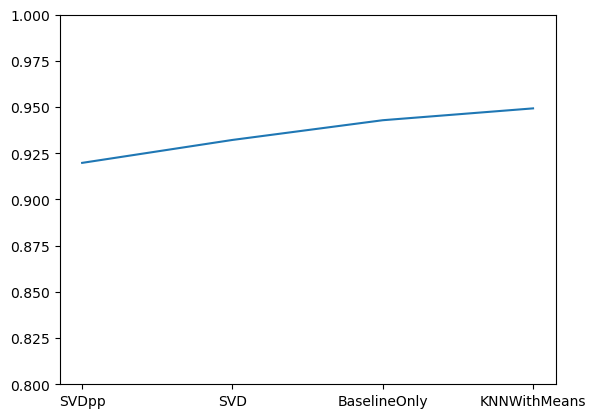

In [8]:
import matplotlib.pyplot as plt

names = []
results = []

for option in alogorithms:
  algo = option()
  names.append(option.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8,1)
plt.plot(names[index],results[index])
results[index]

---
# 3 알고리즘 옵션 지정

In [9]:
sim_options = {'name':'pearson_baseline',
               'user_based':True}
algo = KNNWithMeans(k=30,sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9342


0.9341568613463557

---
# 4 다양한 조건의 비교

In [10]:
data = Dataset.load_builtin(name=u'ml-100k')

# Train/Test 0.75 : 0.25로 분리
trainset, testset = train_test_split(data, test_size=0.2)


result = []

for neighbor_size in (10,20,30,40,50,60):
  algo = KNNWithMeans(k=neighbor_size,
                      sim_options = {'name':'pearson_baseline',
                                     'user_based':True})
  algo.fit(trainset)
  predictions = algo.test(testset)
  result.append([neighbor_size,accuracy.rmse(predictions)])

result


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9471
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9340
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9326
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9320
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9323
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9326


[[10, 0.9470776103600798],
 [20, 0.9339748406232814],
 [30, 0.9325936713640189],
 [40, 0.9320409935518019],
 [50, 0.9322649218830703],
 [60, 0.9325742612181217]]

In [11]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'k':[5,10,15,25],
    'sim_options':{
        'name':['pearson_baseline','cosine'],
        'user_based':[True,False]
    }
}

gs = GridSearchCV(KNNWithMeans,
                  param_grid,
                  measures = ['rmse'],
                  cv=4)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [12]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9241719224861988
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


---
# 5 외부 데이터 사용

In [13]:
import pandas as pd
r_cols = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_csv(
    'u.data',
    names=r_cols,
    sep='\t',
    encoding='latin-1'
)

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']],reader)

In [14]:
data